In [1]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
import os

In [3]:
joint_names = ["RL_hip", "RR_hip", "FL_hip", "FR_hip", 
              "RL_thigh", "RR_thigh", "FL_thigh", "FR_thigh", 
              "RL_calf", "RR_calf", "FL_calf", "FR_calf"]

In [4]:
dt_sim = 0.01

In [5]:
import rospy
import rosbag
from std_msgs.msg import String  # Adjust these imports based on your topics' message types
from sensor_msgs.msg import Image
from geometry_msgs.msg import PoseStamped
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [6]:
def read_bag_topics(file_path):
    # Open the bag file
    bag = rosbag.Bag(file_path)

    # Iterate through the messages in the specified topics
    for topic, msg, t in bag.read_messages(topics=['/topic1', '/topic2', '/topic3']):
        if topic == '/topic1':
            # Process messages from /topic1
            print(f"Time: {t.to_sec()} | Topic: {topic} | Message: {msg.data}")
        elif topic == '/topic2':
            # Process messages from /topic2
            print(f"Time: {t.to_sec()} | Topic: {topic} | Width: {msg.width} | Height: {msg.height}")
        elif topic == '/topic3':
            # Process messages from /topic3
            print(f"Time: {t.to_sec()} | Topic: {topic} | Position: ({msg.pose.position.x}, {msg.pose.position.y}, {msg.pose.position.z})")

    # Close the bag
    bag.close()

In [7]:
%ls ../bags/octagon_task.bag

ls: cannot access '../bags/octagon_task.bag': No such file or directory


In [8]:
%ls

walking_debugging.ipynb


In [11]:
file_path = "../bags/octagon_task_02.bag"

In [12]:
bag = rosbag.Bag(file_path)

In [13]:
topics=['/joint_controller_FR_hip/state', '/joint_controller_FR_thigh/state', '/joint_controller_FR_calf/state',
        '/joint_controller_FL_hip/state', '/joint_controller_FL_thigh/state', '/joint_controller_FL_calf/state',
        '/joint_controller_RR_hip/state', '/joint_controller_RR_thigh/state', '/joint_controller_RR_calf/state',
        '/joint_controller_RL_hip/state', '/joint_controller_RL_thigh/state', '/joint_controller_RL_calf/state',
        '/joint_controller_FR_hip/cmd', '/joint_controller_FR_thigh/cmd', '/joint_controller_FR_calf/cmd',
        '/joint_controller_FL_hip/cmd', '/joint_controller_FL_thigh/cmd', '/joint_controller_FL_calf/cmd',
        '/joint_controller_RR_hip/cmd', '/joint_controller_RR_thigh/cmd', '/joint_controller_RR_calf/cmd',
        '/joint_controller_RL_hip/cmd', '/joint_controller_RL_thigh/cmd', '/joint_controller_RL_calf/cmd',
        '/odom', '/pose', '/quadruped/gait', '/quadruped/goal', '/ground_truth/state']

topics_odom=['/odom',
             '/ground_truth/state']

topics_cmd=['/joint_controller_FR_hip/cmd', '/joint_controller_FR_thigh/cmd', '/joint_controller_FR_calf/cmd',
            '/joint_controller_FL_hip/cmd', '/joint_controller_FL_thigh/cmd', '/joint_controller_FL_calf/cmd',
            '/joint_controller_RR_hip/cmd', '/joint_controller_RR_thigh/cmd', '/joint_controller_RR_calf/cmd',
            '/joint_controller_RL_hip/cmd', '/joint_controller_RL_thigh/cmd', '/joint_controller_RL_calf/cmd']

topics_state=['/joint_controller_FR_hip/state', '/joint_controller_FR_thigh/state', '/joint_controller_FR_calf/state',
              '/joint_controller_FL_hip/state', '/joint_controller_FL_thigh/state', '/joint_controller_FL_calf/state',
              '/joint_controller_RR_hip/state', '/joint_controller_RR_thigh/state', '/joint_controller_RR_calf/state',
              '/joint_controller_RL_hip/state', '/joint_controller_RL_thigh/state', '/joint_controller_RL_calf/state']

In [14]:
bag = rosbag.Bag(file_path)
# Initialize a dictionary to store messages for each topic
data_dict = {topic: [] for topic in topics_odom}
timestamps = []

# Iterate through the messages in the specified topics
for topic, msg, t in bag.read_messages(topics=topics_odom):
    current_time = msg.header.stamp.to_sec()
    if topic == '/odom':
        break

In [15]:
topic

'/odom'

In [16]:
msg.pose.pose.position

x: -0.01816589538593276
y: 4.71636359184947e-05
z: 0.0570020324810677

In [17]:
msg.pose.pose.orientation

x: -6.28642810850871e-06
y: -8.157717326071924e-08
z: -0.00134805080953948
w: 0.9999990913593318

In [18]:
def parse_joint_msg(msg):
    return 

def parse_odom_msg(msg):
    return

def parse_gait_msg(msg):
    return

def parse_pose_cov_msg(msg):
    cov_diagonal = [msg.pose.covariance[0],
                    msg.pose.covariance[7],
                    msg.pose.covariance[14],
                    msg.pose.covariance[21],
                    msg.pose.covariance[28],
                    msg.pose.covariance[35]]
    return cov_diagonal

def parse_vel_cov_msg(msg):
    cov_diagonal = [msg.twist.covariance[0],
                    msg.twist.covariance[7],
                    msg.twist.covariance[14],
                    msg.twist.covariance[21],
                    msg.twist.covariance[28],
                    msg.twist.covariance[35]]
    return cov_diagonal

def parse_pose_msg(msg):
    position = [msg.pose.pose.position.x, 
                msg.pose.pose.position.y, 
                msg.pose.pose.position.z]
    
    orientation = [msg.pose.pose.orientation.w,
                   msg.pose.pose.orientation.x,
                   msg.pose.pose.orientation.y,
                   msg.pose.pose.orientation.z]
    return position, orientation

def parse_vel_msg(msg):
    vel_lin = [msg.twist.twist.linear.x, 
               msg.twist.twist.linear.y, 
               msg.twist.twist.linear.z]
    
    vel_ang = [msg.twist.twist.angular.x,
               msg.twist.twist.angular.y,
               msg.twist.twist.angular.z]
    return vel_lin, vel_ang

In [19]:
def read_vel_lin_from_topics_from_bag(bag_path, topics, start_time=None):
    bag = rosbag.Bag(bag_path)
    # Initialize a dictionary to store messages for each topic
    data_dict = {topic: [] for topic in topics}
    timestamps = []

    # Iterate through the messages in the specified topics
    for topic, msg, t in bag.read_messages(topics=topics):
        if start_time is None:
            start_time = msg.header.stamp.to_sec() #+ 0.01 #t.to_sec() #+ 1
        current_time = msg.header.stamp.to_sec() - start_time #t.to_sec() - start_time
        if current_time >= 0:
            timestamps.append(current_time)
            vel_lin, vel_ang = parse_vel_msg(msg)
            data_dict[topic].append((current_time, vel_lin))
    bag.close()

    # Sort timestamps and create a time array
    timestamps = sorted(list(set(timestamps)))
    time_array = np.array(timestamps)

    # Create a data array where rows are signals and columns are time steps
    data_array = np.zeros((len(topics), len(timestamps), 3))

    for i, topic in enumerate(topics):
        topic_data = {t: q for t, q in data_dict[topic]}
        for j, t in enumerate(timestamps):
            if t in topic_data:
                data_array[i, j, :] = topic_data[t]
            else:
                data_array[i, j] = [np.nan]*3  # or some other value to indicate missing data
    return time_array, data_array, start_time

def read_ang_lin_from_topics_from_bag(bag_path, topics, start_time=None):
    bag = rosbag.Bag(bag_path)
    # Initialize a dictionary to store messages for each topic
    data_dict = {topic: [] for topic in topics}
    timestamps = []

    # Iterate through the messages in the specified topics
    for topic, msg, t in bag.read_messages(topics=topics):
        if start_time is None:
            start_time = msg.header.stamp.to_sec() #+ 0.01 #t.to_sec() #+ 1
        current_time = msg.header.stamp.to_sec() - start_time #t.to_sec() - start_time
        if current_time >= 0:
            timestamps.append(current_time)
            vel_lin, vel_ang = parse_vel_msg(msg)
            data_dict[topic].append((current_time, vel_ang))
    bag.close()

    # Sort timestamps and create a time array
    timestamps = sorted(list(set(timestamps)))
    time_array = np.array(timestamps)

    # Create a data array where rows are signals and columns are time steps
    data_array = np.zeros((len(topics), len(timestamps), 3))

    for i, topic in enumerate(topics):
        topic_data = {t: q for t, q in data_dict[topic]}
        for j, t in enumerate(timestamps):
            if t in topic_data:
                data_array[i, j, :] = topic_data[t]
            else:
                data_array[i, j] = [np.nan]*3  # or some other value to indicate missing data
    return time_array, data_array, start_time

In [21]:
def filter_nans(time_arr, data_arr):
    mask_gt = ~np.isnan(data_arr[1]).all(axis=-1)
    filter_data = data_arr[:,mask_gt]
    filter_time = time_arr[mask_gt]
    mask_odom = ~np.isnan(filter_data[0]).all(axis=-1)
    filter_data = filter_data[:,mask_odom]
    filter_time = filter_time[mask_odom]
    return filter_time, filter_data

In [20]:
time_array_ang, data_array_ang, start_time_ang = read_vel_lin_from_topics_from_bag(file_path, topics_odom)
time_array_lin, data_array_lin, start_time_lin = read_ang_lin_from_topics_from_bag(file_path, topics_odom)

In [22]:
time_arr_lin, data_arr_lin = filter_nans(time_array_lin, data_array_lin)
time_arr_ang, data_arr_ang = filter_nans(time_array_ang, data_array_ang)

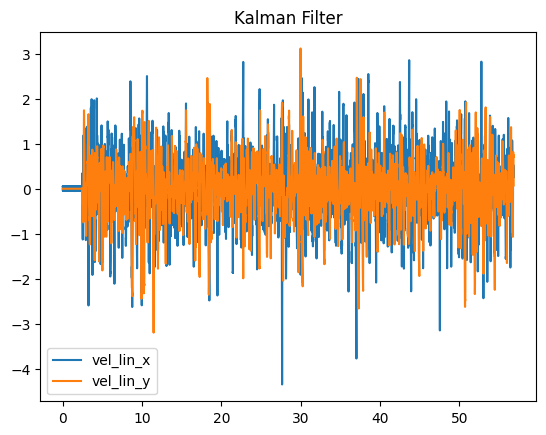

In [23]:
plt.plot(time_arr_lin, data_arr_lin[0,:,:2])
plt.title("Kalman Filter")
plt.legend(["vel_lin_x", "vel_lin_y"])

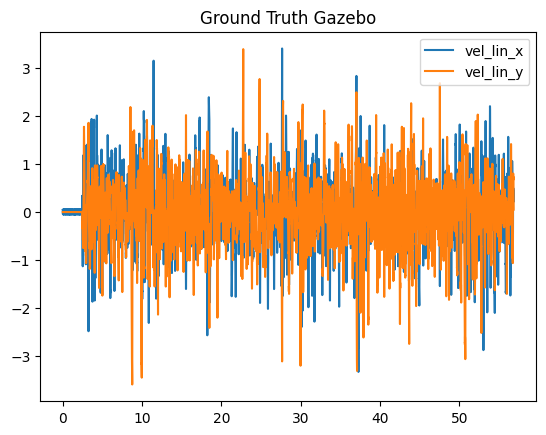

In [24]:
plt.plot(time_arr_lin, data_arr_lin[1,:,:2])
plt.title("Ground Truth Gazebo")
plt.legend(["vel_lin_x", "vel_lin_y"])

In [25]:
residuals_lin = data_arr_lin[1] - data_arr_lin[0]

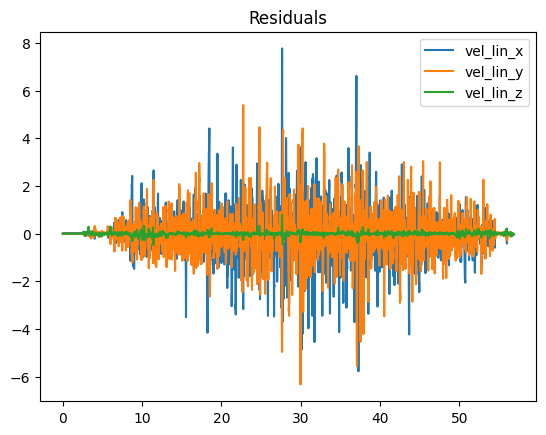

In [26]:
plt.plot(time_arr_lin, residuals_lin)
plt.title("Residuals")
plt.legend(["vel_lin_x", "vel_lin_y", "vel_lin_z"])

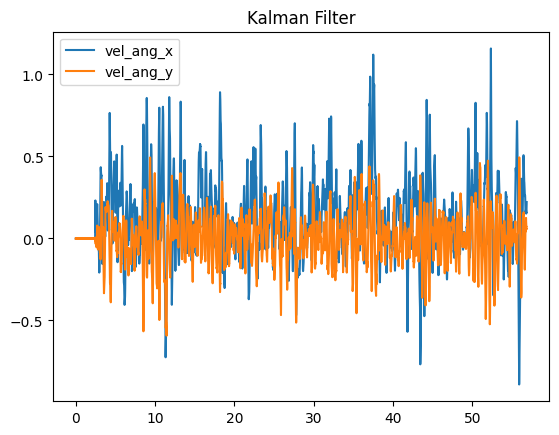

In [27]:
plt.plot(time_arr_ang, data_arr_ang[0,:,:2])
plt.title("Kalman Filter")
plt.legend(["vel_ang_x", "vel_ang_y"])

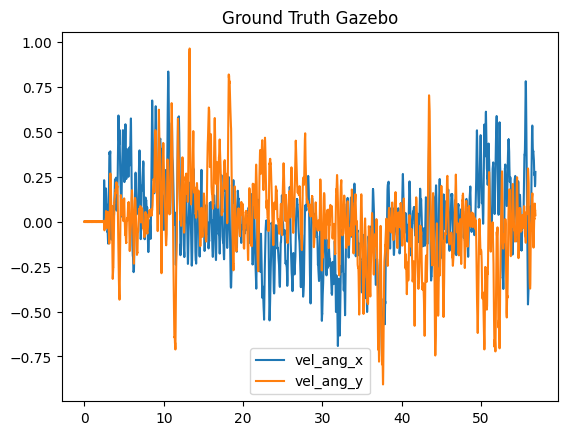

In [28]:
plt.plot(time_arr_ang, data_arr_ang[1,:,:2])
plt.title("Ground Truth Gazebo")
plt.legend(["vel_ang_x", "vel_ang_y"])

In [29]:
residuals_ang = data_arr_ang[1] - data_arr_ang[0]

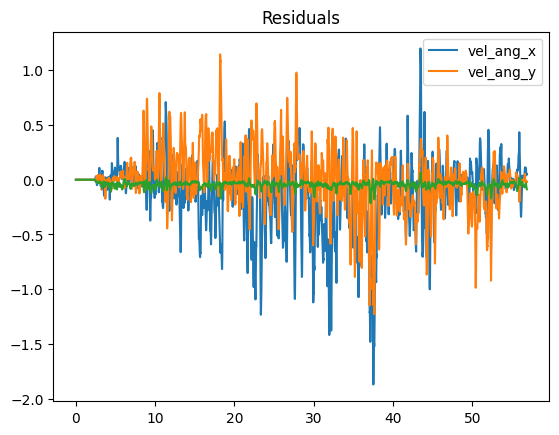

In [30]:
plt.plot(time_arr_ang, residuals_ang)
plt.title("Residuals")
plt.legend(["vel_ang_x", "vel_ang_y"])

## Noise IMU process 0.08

In [31]:
file_path = "../bags/octagon_task_08.bag"

In [32]:
time_array_ang, data_array_ang, start_time_ang = read_vel_lin_from_topics_from_bag(file_path, topics_odom)
time_array_lin, data_array_lin, start_time_lin = read_ang_lin_from_topics_from_bag(file_path, topics_odom)

In [33]:
time_arr_lin, data_arr_lin = filter_nans(time_array_lin, data_array_lin)
time_arr_ang, data_arr_ang = filter_nans(time_array_ang, data_array_ang)

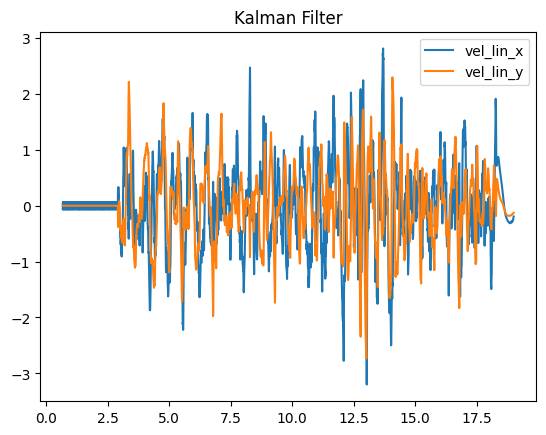

In [35]:
plt.plot(time_arr_lin, data_arr_lin[0,:,:2])
plt.title("Kalman Filter")
plt.legend(["vel_lin_x", "vel_lin_y"])

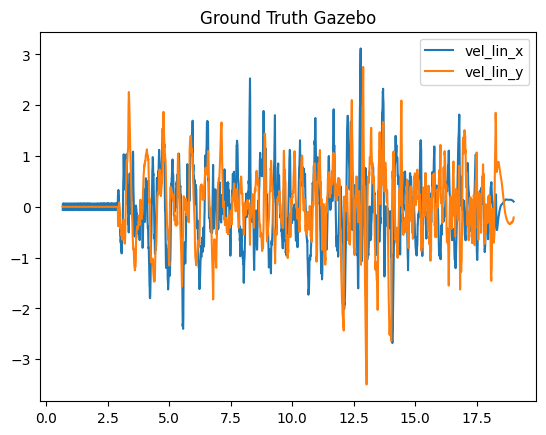

In [36]:
plt.plot(time_arr_lin, data_arr_lin[1,:,:2])
plt.title("Ground Truth Gazebo")
plt.legend(["vel_lin_x", "vel_lin_y"])

In [37]:
residuals_lin = data_arr_lin[1] - data_arr_lin[0]

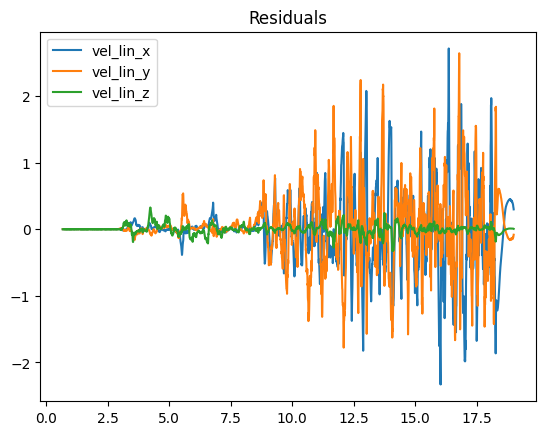

In [38]:
plt.plot(time_arr_lin, residuals_lin)
plt.title("Residuals")
plt.legend(["vel_lin_x", "vel_lin_y", "vel_lin_z"])

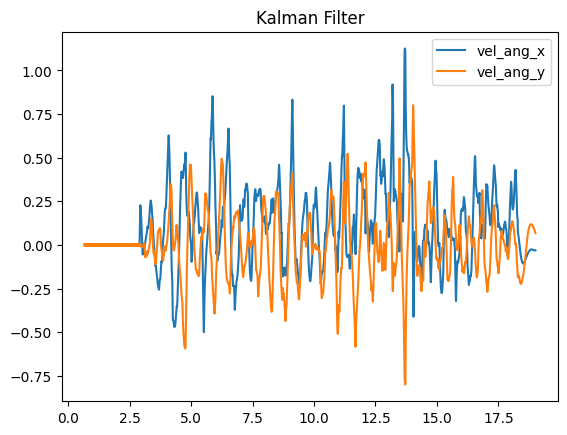

In [39]:
plt.plot(time_arr_ang, data_arr_ang[0,:,:2])
plt.title("Kalman Filter")
plt.legend(["vel_ang_x", "vel_ang_y"])

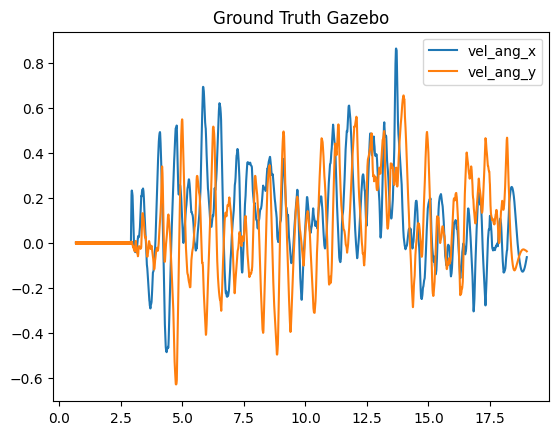

In [40]:
plt.plot(time_arr_ang, data_arr_ang[1,:,:2])
plt.title("Ground Truth Gazebo")
plt.legend(["vel_ang_x", "vel_ang_y"])

In [41]:
residuals_ang = data_arr_ang[1] - data_arr_ang[0]

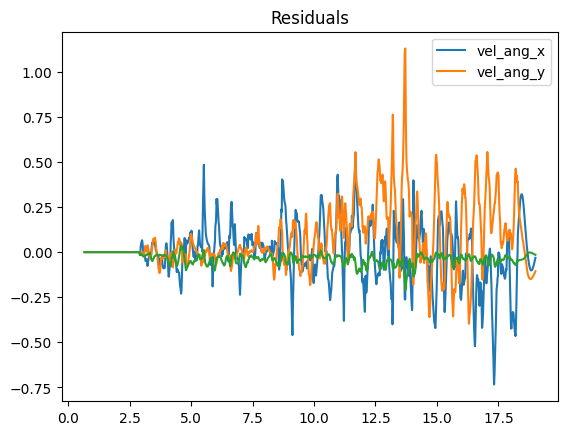

In [42]:
plt.plot(time_arr_ang, residuals_ang)
plt.title("Residuals")
plt.legend(["vel_ang_x", "vel_ang_y"])

## Noise IMU process 0.2

In [43]:
file_path = "../bags/octagon_task_2.bag"

In [44]:
time_array_ang, data_array_ang, start_time_ang = read_vel_lin_from_topics_from_bag(file_path, topics_odom)
time_array_lin, data_array_lin, start_time_lin = read_ang_lin_from_topics_from_bag(file_path, topics_odom)

In [45]:
time_arr_lin, data_arr_lin = filter_nans(time_array_lin, data_array_lin)
time_arr_ang, data_arr_ang = filter_nans(time_array_ang, data_array_ang)

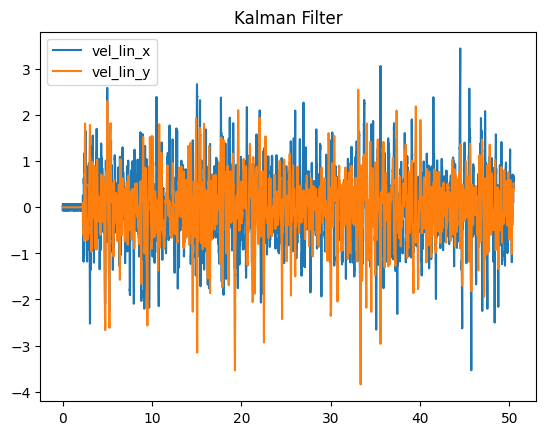

In [46]:
plt.plot(time_arr_lin, data_arr_lin[0,:,:2])
plt.title("Kalman Filter")
plt.legend(["vel_lin_x", "vel_lin_y"])

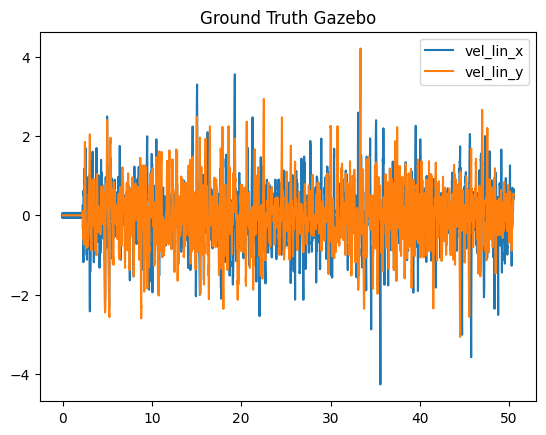

In [47]:
plt.plot(time_arr_lin, data_arr_lin[1,:,:2])
plt.title("Ground Truth Gazebo")
plt.legend(["vel_lin_x", "vel_lin_y"])

In [48]:
residuals_lin = data_arr_lin[1] - data_arr_lin[0]

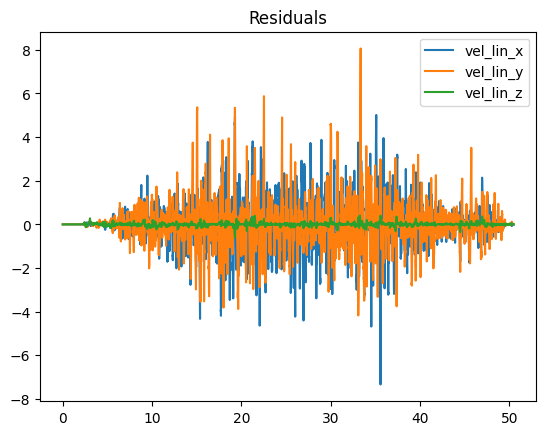

In [49]:
plt.plot(time_arr_lin, residuals_lin)
plt.title("Residuals")
plt.legend(["vel_lin_x", "vel_lin_y", "vel_lin_z"])

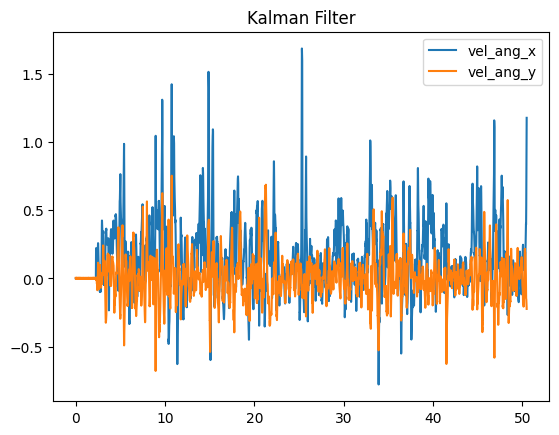

In [50]:
plt.plot(time_arr_ang, data_arr_ang[0,:,:2])
plt.title("Kalman Filter")
plt.legend(["vel_ang_x", "vel_ang_y"])

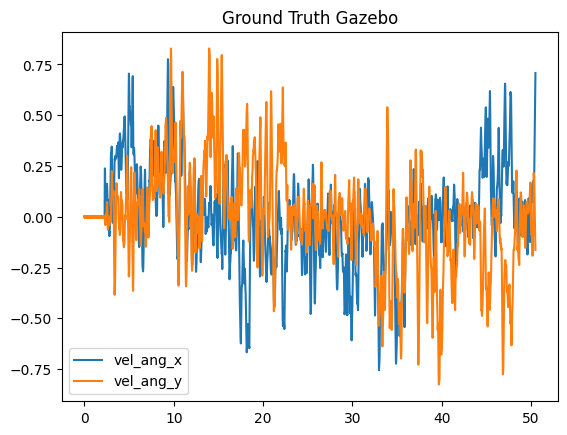

In [51]:
plt.plot(time_arr_ang, data_arr_ang[1,:,:2])
plt.title("Ground Truth Gazebo")
plt.legend(["vel_ang_x", "vel_ang_y"])

In [58]:
residuals_ang = data_arr_ang[1] - data_arr_ang[0]

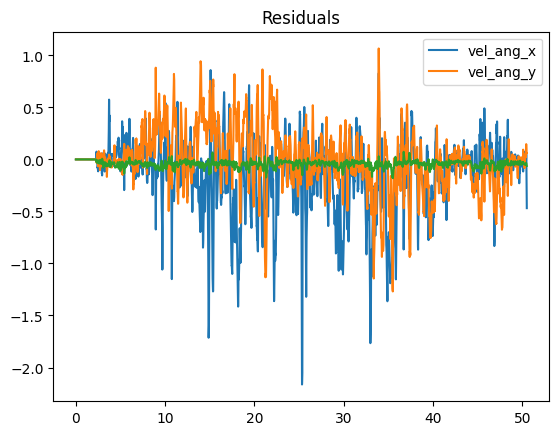

In [60]:
plt.plot(time_arr_ang, residuals_ang)
plt.title("Residuals")
plt.legend(["vel_ang_x", "vel_ang_y"])